# KNN Model

## 1. Import libraries

In [135]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## 2. Đọc Dataset và chia data thành 2 bộ train và test

In [136]:
# Đọc dữ liệu từ file CSV, lấy các cột cần thiết và phân tích cột 'Date' làm chỉ mục
df = pd.read_csv('./Data/gld_price_data.csv', index_col='Date', parse_dates=True, usecols=['Date', 'SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'])

# Sắp xếp dữ liệu theo ngày tăng dần    
df.sort_values(by='Date', ascending=True, inplace=True)

# Đặt lại chỉ mục của DataFrame
df.reset_index(inplace=True)

# Loại bỏ các dòng có giá trị thiếu (NaN) trong dữ liệu
df = df.dropna()

# Tách dữ liệu thành train_data và test_data theo tỉ lệ 80:20
train_data, test_data = train_test_split(df, test_size=0.2, shuffle=False)

# In kích thước của tập dữ liệu huấn luyện
print('Shape of data train', train_data.shape)

# In kích thước của tập dữ liệu kiểm tra
print('Shape of data test', test_data.shape)

# Tách biến mục tiêu 'GLD' từ tập dữ liệu huấn luyện
y_train = train_data['GLD']
y_test = test_data['GLD']

# Tách các biến đầu vào (features) từ tập dữ liệu huấn luyện, loại bỏ cột 'GLD'
X_train = train_data.drop(columns=['GLD'])
X_test = test_data.drop(columns=['GLD'])

Shape of data train (1832, 6)
Shape of data test (458, 6)


## 3. Dataset overview

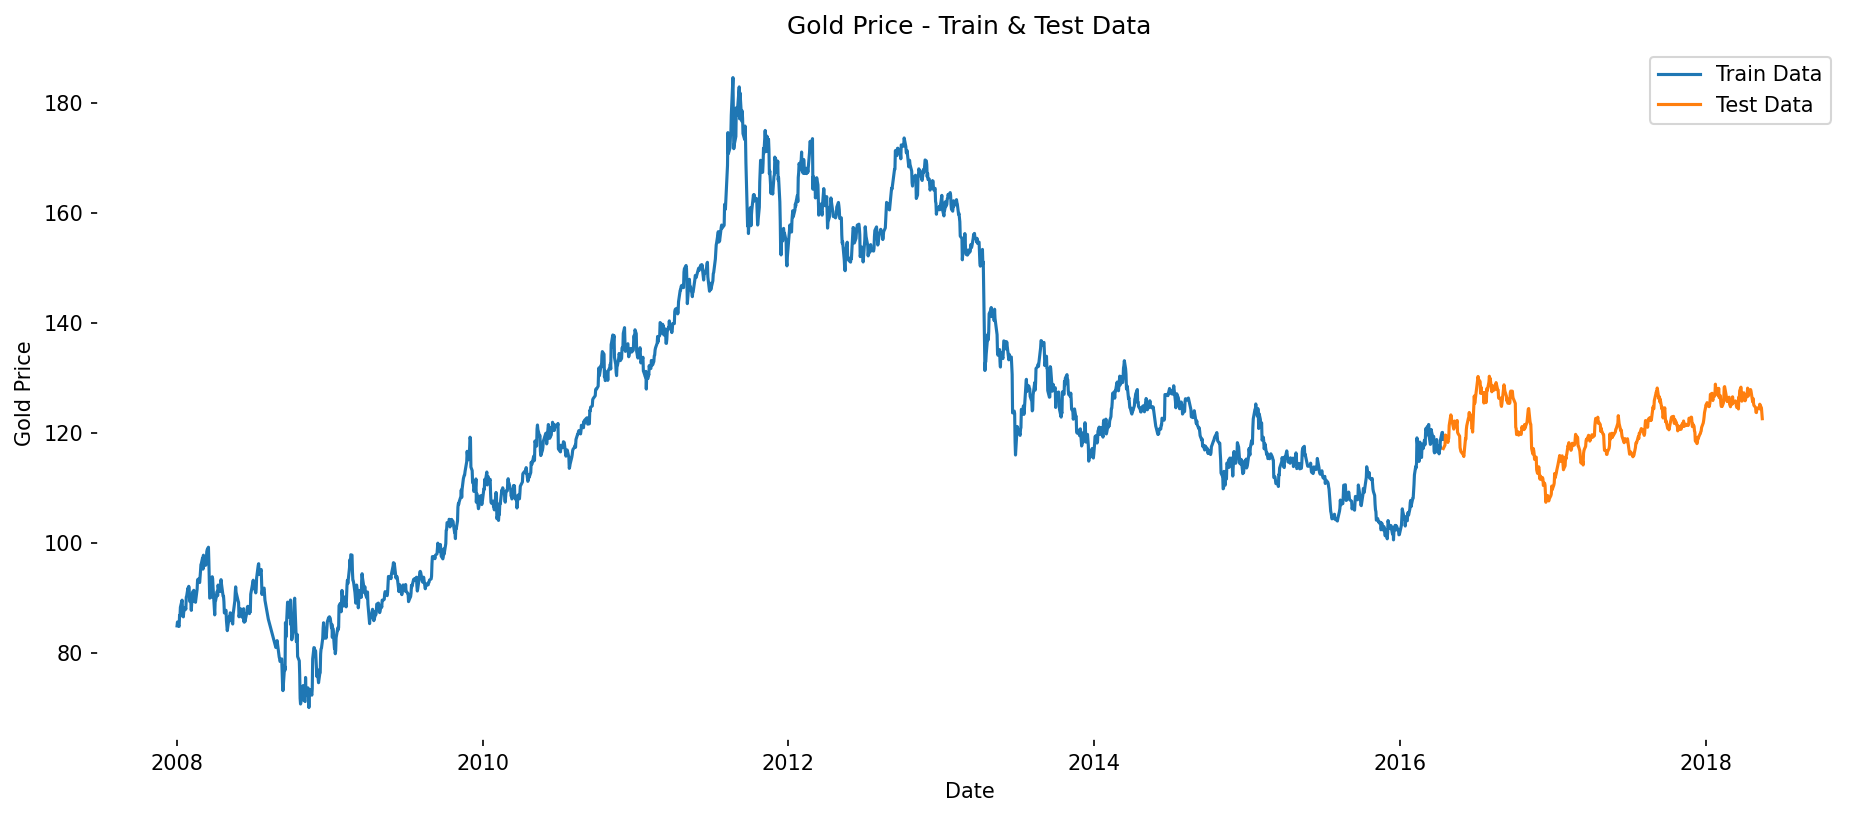

In [137]:
# Thiết lập kích thước biểu đồ với chiều rộng full (ví dụ 15 inch)
plt.figure(figsize=(15, 6), dpi=150)

# Vẽ biểu đồ cho tập huấn luyện (train)
plt.plot(train_data['Date'], y_train, label='Train Data')

# Vẽ biểu đồ cho tập kiểm tra (test)
plt.plot(test_data['Date'], y_test, label='Test Data')

# Thêm tiêu đề và nhãn
plt.title('Gold Price - Train & Test Data')
plt.xlabel('Date')
plt.ylabel('Gold Price')

# Chú thích
plt.legend()

# Hiển thị biểu đồ
plt.grid(color='white')
plt.show()

## 4. Thông tin chi tiết của tập Train và Test

In [138]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1832 entries, 0 to 1831
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     1832 non-null   datetime64[ns]
 1   SPX      1832 non-null   float64       
 2   GLD      1832 non-null   float64       
 3   USO      1832 non-null   float64       
 4   SLV      1832 non-null   float64       
 5   EUR/USD  1832 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 100.2 KB


In [139]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 458 entries, 1832 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     458 non-null    datetime64[ns]
 1   SPX      458 non-null    float64       
 2   GLD      458 non-null    float64       
 3   USO      458 non-null    float64       
 4   SLV      458 non-null    float64       
 5   EUR/USD  458 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 25.0 KB


In [140]:
df.set_index('Date',inplace=True)

### 5. Khởi tạo và huấn luyện mô hình KNN

#### 5.1. Chuẩn hoá dữ liệu

In [141]:
from sklearn.preprocessing import StandardScaler

X_train.set_index('Date',inplace=True)
X_test.set_index('Date',inplace=True)

# Chuẩn hoá dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### 5.2. Huấn luyện mô hình KNN

In [142]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize KNN model with 5 neighbors
knn = KNeighborsRegressor(n_neighbors=5, metric='euclidean')

# Fit the model on the training data
knn.fit(X_train_scaled, y_train)

KNeighborsRegressor(metric='euclidean')

### 6. Dự đoán và tính toán các độ đo

In [143]:
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

# Dự đoán
y_pred = knn.predict(X_test_scaled)

# Tính các độ đo
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}')

Root Mean Squared Error (RMSE): 7.88093440185485
Mean Absolute Percentage Error (MAPE): 0.05761552903060499


### 7. Biểu đồ dự đoán của mô hình

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 458 entries, 2016-04-14 to 2018-05-16
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SPX            458 non-null    float64
 1   USO            458 non-null    float64
 2   SLV            458 non-null    float64
 3   EUR/USD        458 non-null    float64
 4   Actual_GLD     458 non-null    float64
 5   Predicted_GLD  458 non-null    float64
dtypes: float64(6)
memory usage: 25.0 KB


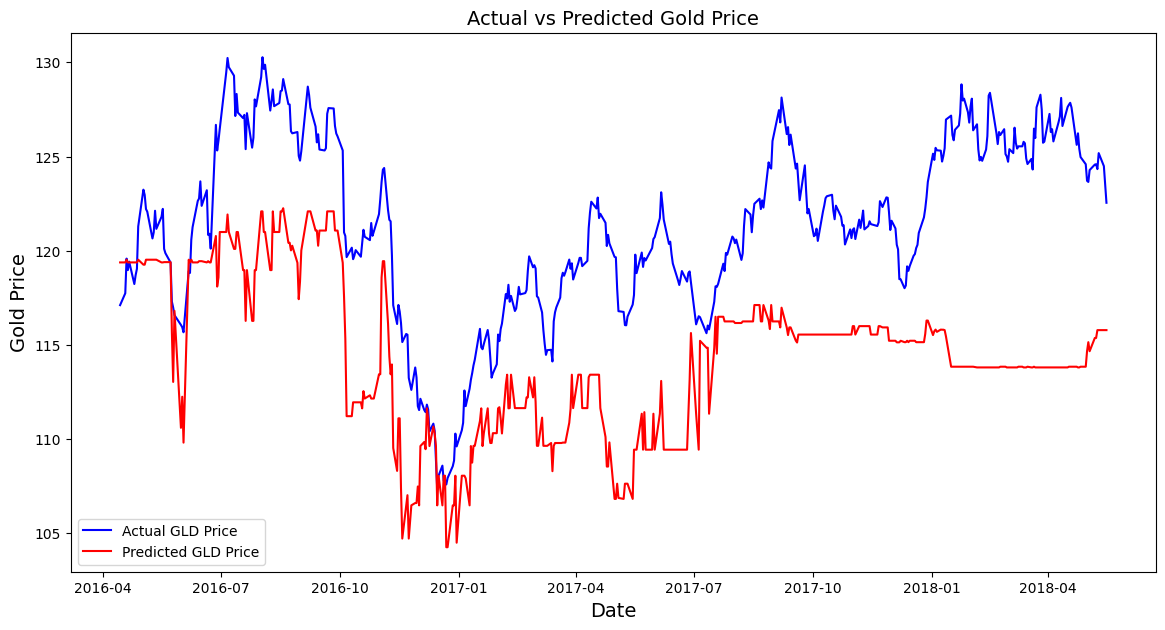

In [144]:
# Chuyển X_test và y_test về DataFrame để dễ dàng thao tác
y_test.index = test_data['Date']

X_test_df = pd.DataFrame(X_test, index=X_test.index)
y_test_df = pd.DataFrame(y_test, index=y_test.index)
y_pred_df = pd.DataFrame(y_pred, index=X_test.index, columns=['Predicted_GLD'])

# Gộp y_test_df và y_pred_df vào X_test_df để có một DataFrame chứa tất cả thông tin
result_df = X_test_df.copy()
result_df['Actual_GLD'] = y_test_df
result_df['Predicted_GLD'] = y_pred_df

# Sắp xếp lại theo Date
result_df.sort_index(inplace=True)

result_df.info()

# Trực quan hóa dữ liệu
plt.figure(figsize=(14, 7))
plt.rcParams['axes.facecolor'] = 'white'

plt.plot(result_df.index, result_df['Actual_GLD'], label='Actual GLD Price', color='blue')
plt.plot(result_df.index, result_df['Predicted_GLD'], label='Predicted GLD Price', color='red')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Gold Price', fontsize=14)
plt.title('Actual vs Predicted Gold Price', fontsize=14)

# Đặt màu cho đường viền của trục
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['top'].set_color('black')
plt.gca().spines['left'].set_color('black')
plt.gca().spines['right'].set_color('black')

plt.legend()
plt.show()

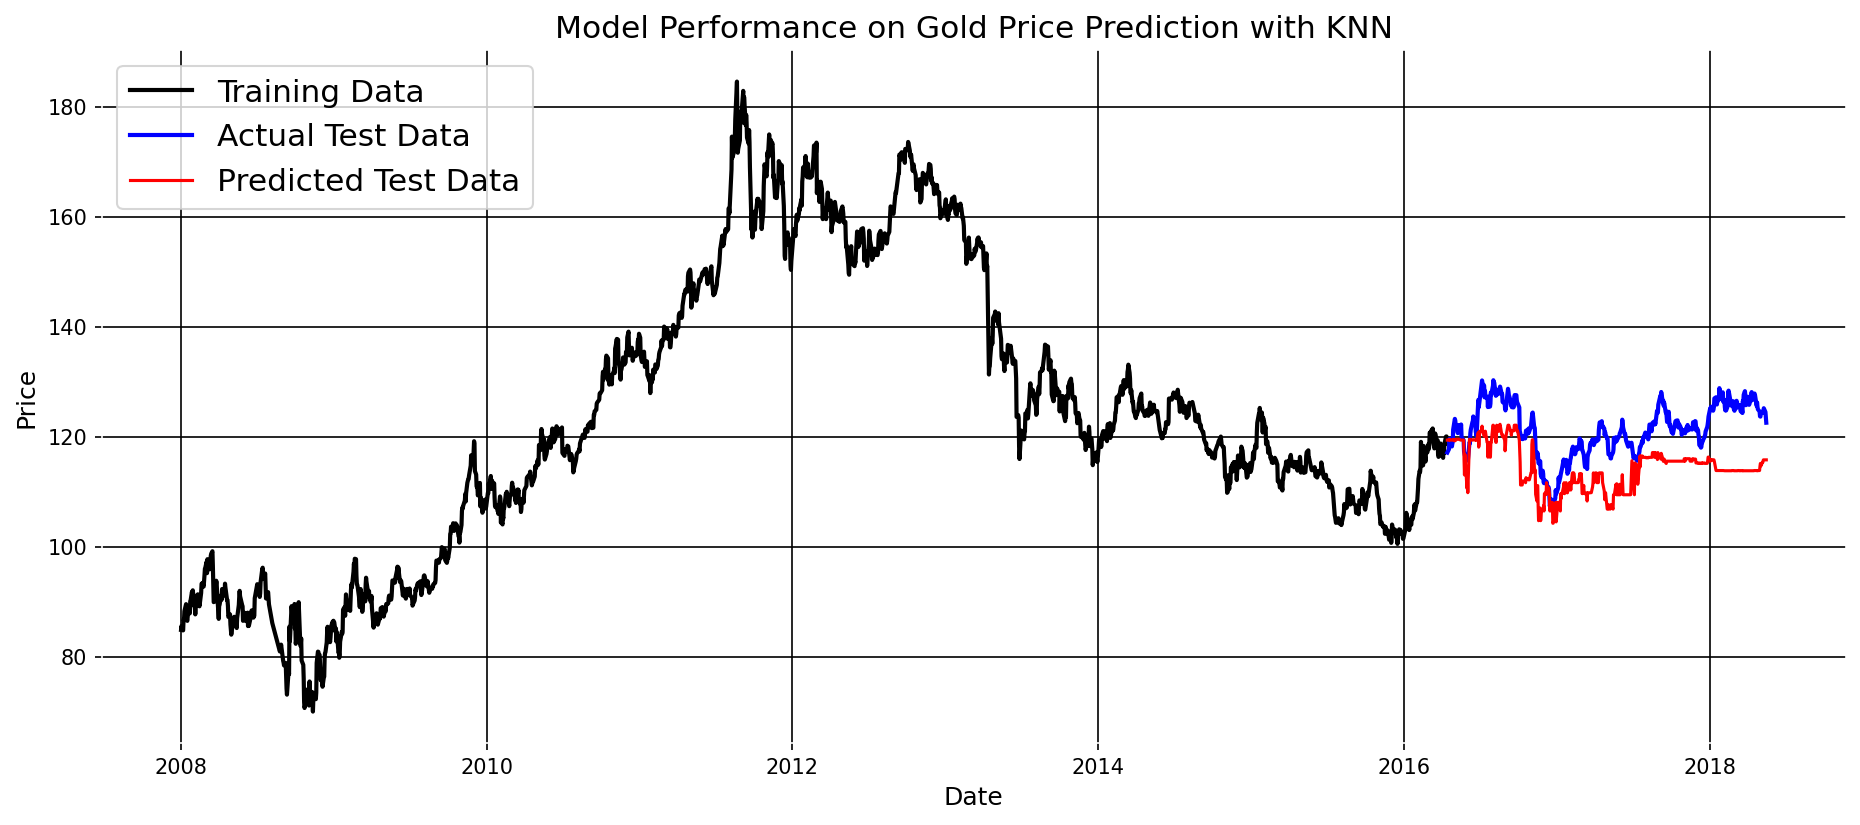

In [145]:
plt.figure(figsize=(15, 6), dpi=150)
plt.rcParams['axes.facecolor'] = 'white'
plt.rc('axes', edgecolor='white')

# Vẽ dữ liệu huấn luyện
plt.plot(X_train.index, y_train, color='black', lw=2)

# Vẽ dữ liệu thực tế của tập kiểm tra
plt.plot(result_df.index, y_test_df, color='blue', lw=2)

# Vẽ dữ liệu dự đoán từ mô hình ARIMA
plt.plot(result_df.index, y_pred_df, label='Forecasted Data', color='red')

plt.title('Model Performance on Gold Price Prediction with KNN', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(['Training Data', 'Actual Test Data', 'Predicted Test Data'], loc='upper left', prop={'size': 15})
plt.grid(color='black')
plt.show()